In [1]:
import wordcloud
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read the csv file
df = pd.read_csv('../csv/keys/keys/type_name_key.csv')

# only keep the columns we need
df = df[['year','count', 'type_name_s']]

# clean the type_name_s column
# remove non-alphanumeric characters
df['type_name_s'] = df['type_name_s'].str.replace(r'[^a-zA-Z0-9 ]', '')
# remove double spaces
df['type_name_s'] = df['type_name_s'].str.replace(r'  ', ' ')
# strip whitespace
df['type_name_s'] = df['type_name_s'].str.lower().str.strip()

# drop duplicates and sort by count
df = df.drop_duplicates(subset='type_name_s').sort_values('count', ascending=False)

# print(df)

/tmp/ipykernel_38790/3237687948.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df['type_name_s'] = df['type_name_s'].str.replace(r'[^a-zA-Z0-9 ]', '')


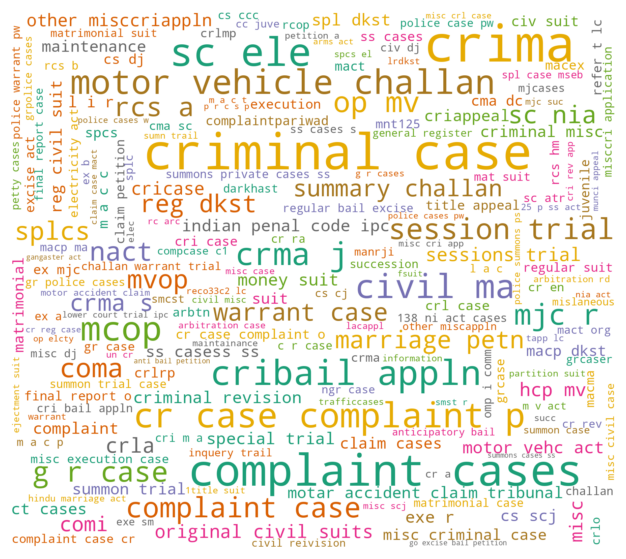

In [6]:
# keep only words with more than 3 characters
df = df[df['type_name_s'].str.len() > 3]

# create a wordcloud
wc = wordcloud.WordCloud(width=1800, height=1600, background_color='white', colormap='Dark2',
						 max_font_size=150, random_state=42)
wc.generate_from_frequencies(df.set_index('type_name_s')['count'])	

# plot the wordcloud
plt.figure(figsize=(10, 7))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()